In [3]:
import pandas as pd
import numpy as np
import ast

# Especificar el separador (usualmente coma o punto y coma)
df = pd.read_csv('metadata_california.csv', sep=',', encoding='ISO-8859-1', on_bad_lines='skip')

print(df.head())


                  name                                            address  \
0         San Soo Dang  San Soo Dang, 761 S Vermont Ave, Los Angeles, ...   
1         Vons Chicken  Vons Chicken, 12740 La Mirada Blvd, La Mirada,...   
2      TACOS LA CABANA  TACOS LA CABANA, 2015 22nd Ave, Oakland, CA 94606   
3  Mariscos el poblano  Mariscos el poblano, 5401-5441 Coliseum Way, O...   
4         Off The Hoof    Off The Hoof, 201 E 4th St, Santa Ana, CA 92701   

                                 gmap_id description   latitude   longitude  \
0  0x80c2c778e3b73d33:0xbdc58662a4a97d49         NaN  34.058092 -118.292130   
1  0x80dd2b4c8555edb7:0xfc33d65c4bdbef42         NaN  33.916402 -118.010855   
2  0x808f879f35b5088b:0xe3541cec7a95bd88         NaN  37.789076 -122.233884   
3  0x808f87f90c1f661f:0xf384e804a61e0c0b         NaN  37.764203 -122.214647   
4  0x80dcd95d192d988b:0x68795f58e35bf888         NaN  33.748329 -117.866045   

            category  avg_rating  num_of_reviews price  \
0  K

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32492 entries, 0 to 32491
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              32491 non-null  object 
 1   address           32313 non-null  object 
 2   gmap_id           32488 non-null  object 
 3   description       11351 non-null  object 
 4   latitude          32488 non-null  float64
 5   longitude         32488 non-null  float64
 6   category          32488 non-null  object 
 7   avg_rating        32488 non-null  float64
 8   num_of_reviews    32488 non-null  float64
 9   price             15706 non-null  object 
 10  hours             29539 non-null  object 
 11  MISC              32121 non-null  object 
 12  state             29595 non-null  object 
 13  relative_results  26573 non-null  object 
 14  url               32488 non-null  object 
dtypes: float64(4), object(11)
memory usage: 3.7+ MB


In [5]:
# Datos nulos
print("Datos nulos por columna:")
print(df.isnull().sum())

Datos nulos por columna:
name                    1
address               179
gmap_id                 4
description         21141
latitude                4
longitude               4
category                4
avg_rating              4
num_of_reviews          4
price               16786
hours                2953
MISC                  371
state                2897
relative_results     5919
url                     4
dtype: int64


In [6]:
#Imputacion de  valores nulos en columnas críticas
df['price'].fillna('Unknown', inplace=True)
df['description'].fillna('No description', inplace=True)
df['state'].fillna('Unknown', inplace=True)


C:\Users\evely\AppData\Local\Temp\ipykernel_13720\672943975.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna('Unknown', inplace=True)
C:\Users\evely\AppData\Local\Temp\ipykernel_13720\672943975.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [7]:
# Datos nulos
print("Datos nulos por columna:")
print(df.isnull().sum())

Datos nulos por columna:
name                   1
address              179
gmap_id                4
description            0
latitude               4
longitude              4
category               4
avg_rating             4
num_of_reviews         4
price                  0
hours               2953
MISC                 371
state                  0
relative_results    5919
url                    4
dtype: int64


 La columna relative_results tiene una alta proporción de datos nulos (más de 18% de entradas están vacías). Esto puede indicar que los datos en esta columna no están suficientemente completos o no aportan información significativa.

columnas a tomar en cuenta

In [8]:
# Datos duplicados
print(f"Número de filas duplicadas: {df.duplicated().sum()}")

Número de filas duplicadas: 156


In [9]:
# Identificar filas duplicadas
duplicates = df[df.duplicated()]

# Ver el número de filas duplicadas
num_duplicates = len(duplicates)
print(f"Número de filas duplicadas: {num_duplicates}")

# Mostrar las filas duplicadas
print(duplicates)

Número de filas duplicadas: 156
                                 name  \
156                      San Soo Dang   
157                      Vons Chicken   
158                   TACOS LA CABANA   
159               Mariscos el poblano   
160                      Off The Hoof   
..                                ...   
307                            MamaOH   
308                   Portion Control   
309  Chit Chat Restaurant Cafe Lounge   
310                   The Mondo Truck   
311                            Subway   

                                               address  \
156  San Soo Dang, 761 S Vermont Ave, Los Angeles, ...   
157  Vons Chicken, 12740 La Mirada Blvd, La Mirada,...   
158  TACOS LA CABANA, 2015 22nd Ave, Oakland, CA 94606   
159  Mariscos el poblano, 5401-5441 Coliseum Way, O...   
160    Off The Hoof, 201 E 4th St, Santa Ana, CA 92701   
..                                                 ...   
307   MamaOH, 8635 S Rainbow Blvd, Las Vegas, NV 89139   
308  Portio

Por ahora no eliminare duplicados

In [10]:
print(df.columns)


Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')


In [11]:
df.dtypes


name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews      float64
price                object
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object

In [12]:
import ast
import pandas as pd

# Verificar columnas existentes
print("Columnas disponibles:", df.columns)

# Función para verificar si un valor es una lista
def is_list(value):
    return isinstance(value, list)

# Función para verificar si un valor es un diccionario
def is_dict(value):
    return isinstance(value, dict)

# Función para expandir columnas con listas y evitar superposición
def expand_list_column(df, column):
    if column in df.columns:
        # Convierte los valores en la columna a listas (si es posible)
        df[column] = df[column].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
        
        # Solo expande las listas, otros valores se mantienen como NaN
        df[column] = df[column].apply(lambda x: x if is_list(x) else [])
        
        # Expande la lista en nuevas columnas
        expanded_df = pd.DataFrame(df[column].tolist())
        
        # Genera nombres de columnas únicos
        expanded_df.columns = [f"{column}_{i}" for i in range(expanded_df.shape[1])]
        
        # Une el DataFrame expandido con el DataFrame original
        df = df.drop(columns=[column]).join(expanded_df)
    
    return df

# Función para desanidar diccionarios
def expand_dict_column(df, column):
    if column in df.columns:
        # Convierte los valores en la columna a diccionarios (si es posible)
        df[column] = df[column].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
        
        # Desanida solo si es un diccionario
        df[column] = df[column].apply(lambda x: x if is_dict(x) else {})
        
        # Expande el diccionario en nuevas columnas
        expanded_df = pd.json_normalize(df[column])
        
        # Genera nombres de columnas únicos
        expanded_df.columns = [f"{column}_{col}" for col in expanded_df.columns]
        
        # Une el DataFrame expandido con el DataFrame original
        df = df.drop(columns=[column]).join(expanded_df)
    
    return df

# Expandir la columna 'MISC' si existe (es un diccionario con listas)
if 'MISC' in df.columns:
    df = expand_dict_column(df, 'MISC')

# Expandir columnas adicionales con listas
df = expand_list_column(df, 'Atmosphere')
df = expand_list_column(df, 'Health & safety')

# Manejar valores NaN
df.fillna('', inplace=True)

# Verificar resultados
print(df.head())



Columnas disponibles: Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')


C:\Users\evely\AppData\Local\Temp\ipykernel_13720\1590303342.py:64: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('', inplace=True)


                  name                                            address  \
0         San Soo Dang  San Soo Dang, 761 S Vermont Ave, Los Angeles, ...   
1         Vons Chicken  Vons Chicken, 12740 La Mirada Blvd, La Mirada,...   
2      TACOS LA CABANA  TACOS LA CABANA, 2015 22nd Ave, Oakland, CA 94606   
3  Mariscos el poblano  Mariscos el poblano, 5401-5441 Coliseum Way, O...   
4         Off The Hoof    Off The Hoof, 201 E 4th St, Santa Ana, CA 92701   

                                 gmap_id     description   latitude  \
0  0x80c2c778e3b73d33:0xbdc58662a4a97d49  No description  34.058092   
1  0x80dd2b4c8555edb7:0xfc33d65c4bdbef42  No description  33.916402   
2  0x808f879f35b5088b:0xe3541cec7a95bd88  No description  37.789076   
3  0x808f87f90c1f661f:0xf384e804a61e0c0b  No description  37.764203   
4  0x80dcd95d192d988b:0x68795f58e35bf888  No description  33.748329   

    longitude           category avg_rating num_of_reviews    price  ...  \
0  -118.29213  Korean restaurant  

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32492 entries, 0 to 32491
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    32492 non-null  object
 1   address                 32492 non-null  object
 2   gmap_id                 32492 non-null  object
 3   description             32492 non-null  object
 4   latitude                32492 non-null  object
 5   longitude               32492 non-null  object
 6   category                32492 non-null  object
 7   avg_rating              32492 non-null  object
 8   num_of_reviews          32492 non-null  object
 9   price                   32492 non-null  object
 10  hours                   32492 non-null  object
 11  state                   32492 non-null  object
 12  relative_results        32492 non-null  object
 13  url                     32492 non-null  object
 14  MISC_Service options    32492 non-null  object
 15  MI

In [14]:

# Función para desanidar listas, convirtiéndolas en strings separados por comas
def flatten_list_column(df, column):
    def safely_eval(val):
        # Intentar evaluar la expresión, pero si falla, devolver el valor original
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return val
    
    if column in df.columns:
        df[column] = df[column].apply(lambda x: safely_eval(x) if isinstance(x, str) else x)
        df[column] = df[column].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
    return df

# Aplicamos el desanidamiento de las columnas con listas
list_columns = [
    'MISC_Atmosphere', 'MISC_Health & safety', 'MISC_Popular for',
    'MISC_Dining options', 'MISC_Crowd', 'MISC_Highlights', 
    'MISC_Planning', 'MISC_Payments', 'MISC_From the business',
    'MISC_Service options', 'MISC_Accessibility', 'MISC_Offerings', 
    'MISC_Amenities'
]

for col in list_columns:
    df = flatten_list_column(df, col)

# Convertir las columnas relevantes a numéricas (si no se hizo)
df['avg_rating'] = pd.to_numeric(df['avg_rating'], errors='coerce')
df['num_of_reviews'] = pd.to_numeric(df['num_of_reviews'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Verificar resultados
print(df.head())
print(df.info())





                  name                                            address  \
0         San Soo Dang  San Soo Dang, 761 S Vermont Ave, Los Angeles, ...   
1         Vons Chicken  Vons Chicken, 12740 La Mirada Blvd, La Mirada,...   
2      TACOS LA CABANA  TACOS LA CABANA, 2015 22nd Ave, Oakland, CA 94606   
3  Mariscos el poblano  Mariscos el poblano, 5401-5441 Coliseum Way, O...   
4         Off The Hoof    Off The Hoof, 201 E 4th St, Santa Ana, CA 92701   

                                 gmap_id     description   latitude  \
0  0x80c2c778e3b73d33:0xbdc58662a4a97d49  No description  34.058092   
1  0x80dd2b4c8555edb7:0xfc33d65c4bdbef42  No description  33.916402   
2  0x808f879f35b5088b:0xe3541cec7a95bd88  No description  37.789076   
3  0x808f87f90c1f661f:0xf384e804a61e0c0b  No description  37.764203   
4  0x80dcd95d192d988b:0x68795f58e35bf888  No description  33.748329   

    longitude           category  avg_rating  num_of_reviews    price  ...  \
0 -118.292130  Korean restaurant

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32492 entries, 0 to 32491
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    32492 non-null  object 
 1   address                 32492 non-null  object 
 2   gmap_id                 32492 non-null  object 
 3   description             32492 non-null  object 
 4   latitude                32488 non-null  float64
 5   longitude               32488 non-null  float64
 6   category                32492 non-null  object 
 7   avg_rating              32488 non-null  float64
 8   num_of_reviews          32488 non-null  float64
 9   price                   32492 non-null  object 
 10  hours                   32492 non-null  object 
 11  state                   32492 non-null  object 
 12  relative_results        32492 non-null  object 
 13  url                     32492 non-null  object 
 14  MISC_Service options    32492 non-null

In [16]:
df.to_csv('desanidado.csv')

Redduccion sin eliminar a columnas que tienen relevancia

In [94]:
# Seleccionar las columnas relevantes para tu análisis
df_reduced = df[[
    'name', 'address', 'category', 'avg_rating', 'num_of_reviews', 'state',
    'MISC_Atmosphere', 'MISC_Popular for', 'MISC_Dining options', 'MISC_Crowd',
    'MISC_Service options'
]]

print(df_reduced.head())

                  name                                            address  \
0         San Soo Dang  San Soo Dang, 761 S Vermont Ave, Los Angeles, ...   
1         Vons Chicken  Vons Chicken, 12740 La Mirada Blvd, La Mirada,...   
2      TACOS LA CABANA  TACOS LA CABANA, 2015 22nd Ave, Oakland, CA 94606   
3  Mariscos el poblano  Mariscos el poblano, 5401-5441 Coliseum Way, O...   
4         Off The Hoof    Off The Hoof, 201 E 4th St, Santa Ana, CA 92701   

            category  avg_rating  num_of_reviews                   state  \
0  Korean restaurant         4.4            18.0       Open Å Closes 6PM   
1         Restaurant         4.5            18.0    Open Å Closes 9:30PM   
2    Taco restaurant         5.0             2.0  Closed Å Opens 5PM Fri   
3         Restaurant         5.0             3.0      Open Å Closes 12AM   
4         Restaurant         4.0             3.0      Permanently closed   

  MISC_Atmosphere            MISC_Popular for MISC_Dining options  \
0          

In [95]:
# Realizar análisis exploratorio preliminar (EDA)
# Ejemplo: Distribución de categorías de restaurantes
category_distribution = df['category'].value_counts()
print("Distribución de categorías de restaurantes:")
print(category_distribution)



Distribución de categorías de restaurantes:
category
Restaurant                                                                               4965
Mexican restaurant                                                                       2058
Sandwich shop, Caterer, Fast food restaurant, Takeout Restaurant, Restaurant              930
Chinese restaurant                                                                        814
Pizza restaurant                                                                          611
                                                                                         ... 
Pizza restaurant, Chicken wings restaurant, Fast food restaurant, Pizza Takeout             1
Fast food restaurant, Snack bar                                                             1
Restaurant, Middle Eastern restaurant, Vegan restaurant                                     1
Cocktail bar, Bar, Beer garden, Beer hall, Brewery, Brewpub, Sports bar                     1
Mexican

In [96]:
# Ejemplo: Promedio de calificaciones por categoría de restaurante
avg_rating_by_category = df.groupby('category')['avg_rating'].mean()
print("\nPromedio de calificaciones por categoría:")
print(avg_rating_by_category)


Promedio de calificaciones por categoría:
category
                                                                                                                                        NaN
"Childrens amusement center", American restaurant, "Childrens party service", Family restaurant, Pizza restaurant, Video arcade    3.933333
"Farmers market", Food products supplier, Health food store, Produce market                                                        4.800000
"Homeowners association", Campground, Equestrian facility, Golf course, Recreation center, Restaurant, Ski resort                  4.600000
"Jehovahs Witness Kingdom Hall", European restaurant                                                                               4.900000
                                                                                                                                     ...   
Yakisoba Restaurant, Japanese restaurant                                                                    

Graficas

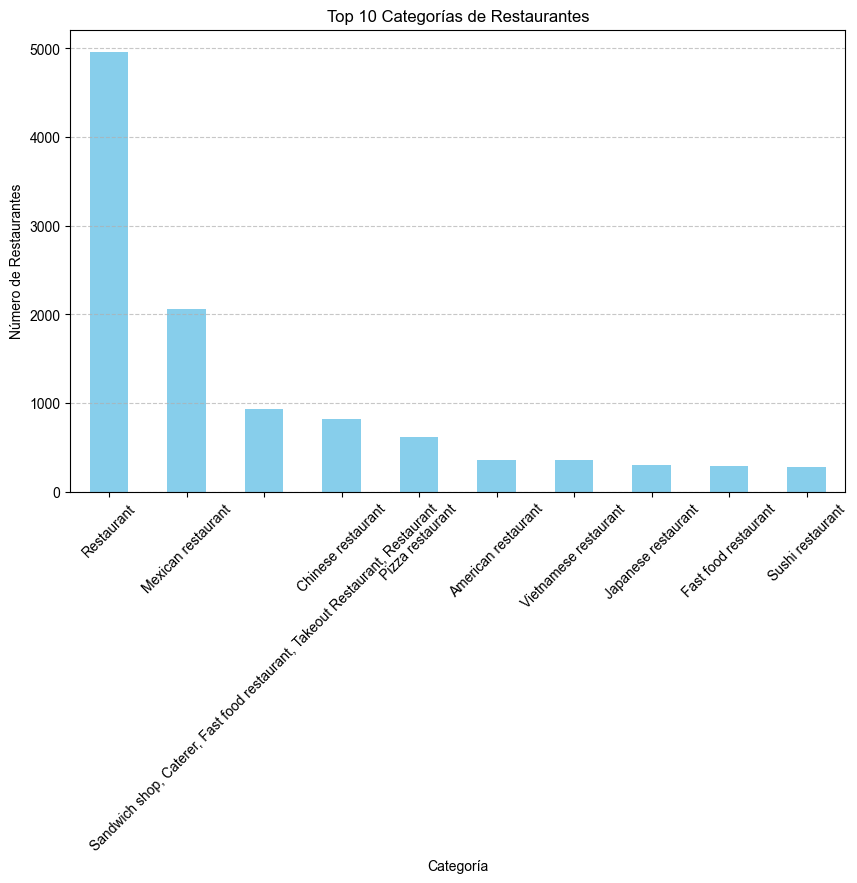

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Configurar la fuente
mpl.rcParams['font.family'] = 'Arial'

# Asegúrate de que estás trabajando con una copia del DataFrame
df_reduced = df.copy()

# Usar .loc para evitar la advertencia
df_reduced.loc[:, 'avg_rating'] = pd.to_numeric(df_reduced['avg_rating'], errors='coerce')
df_reduced.loc[:, 'num_of_reviews'] = pd.to_numeric(df_reduced['num_of_reviews'], errors='coerce')

# Graficar distribución de las 10 principales categorías de restaurantes
category_counts = df_reduced['category'].value_counts().head(10)
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categorías de Restaurantes')
plt.xlabel('Categoría')
plt.ylabel('Número de Restaurantes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



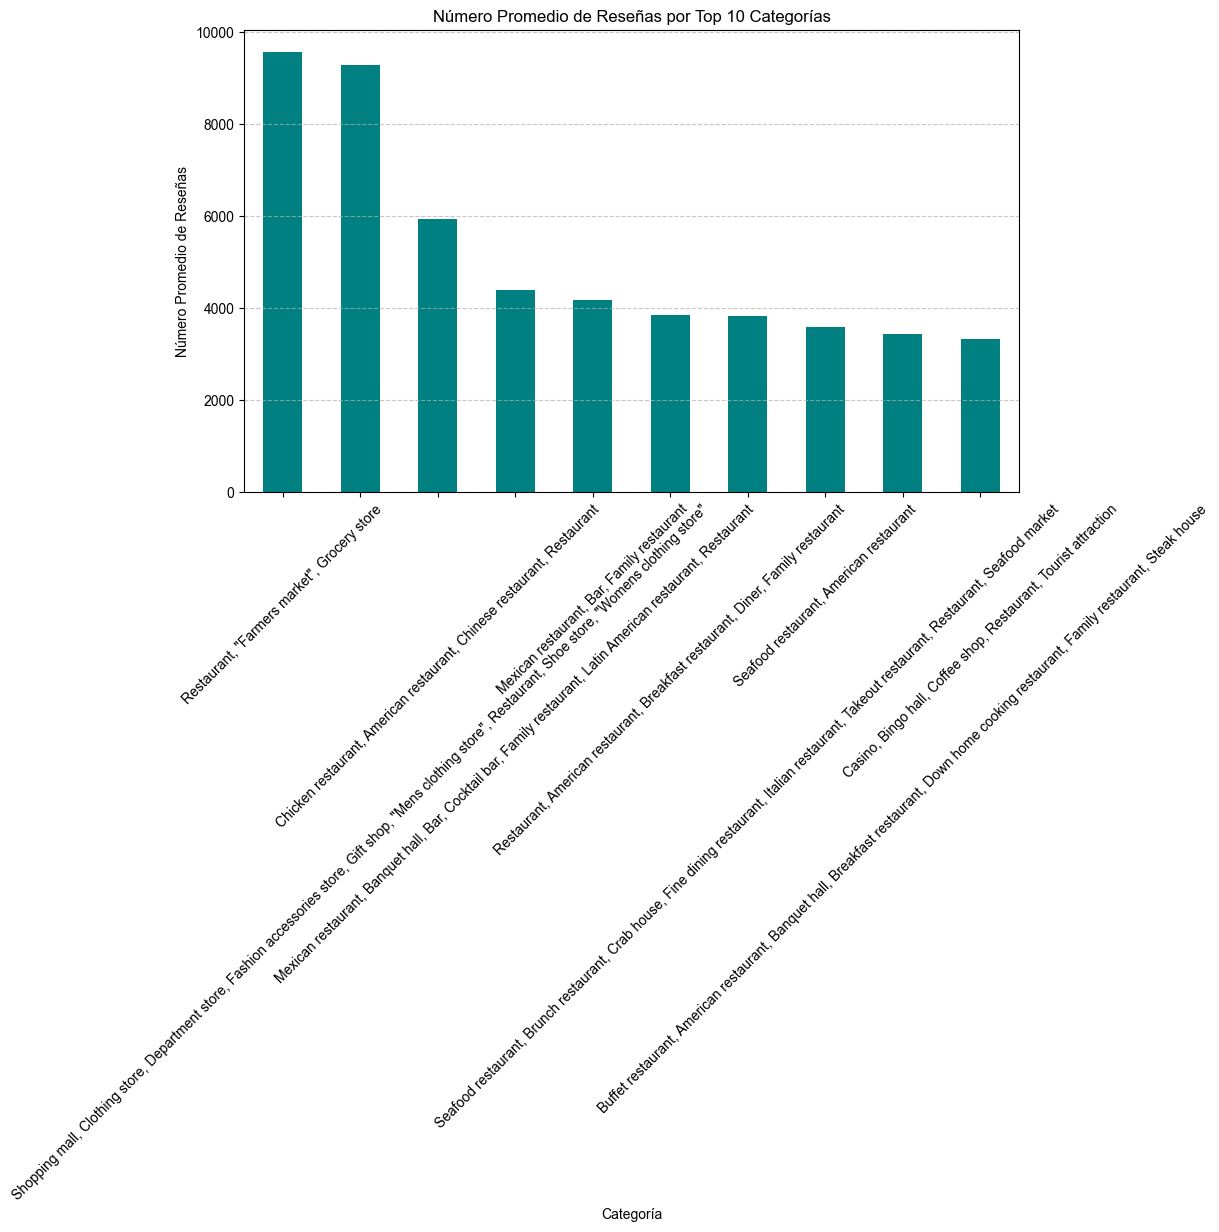

In [100]:
# Número promedio de reseñas por las 10 principales categorías
avg_reviews_by_category = df_reduced.groupby('category')['num_of_reviews'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
avg_reviews_by_category.plot(kind='bar', color='teal')
plt.title('Número Promedio de Reseñas por Top 10 Categorías')
plt.xlabel('Categoría')
plt.ylabel('Número Promedio de Reseñas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

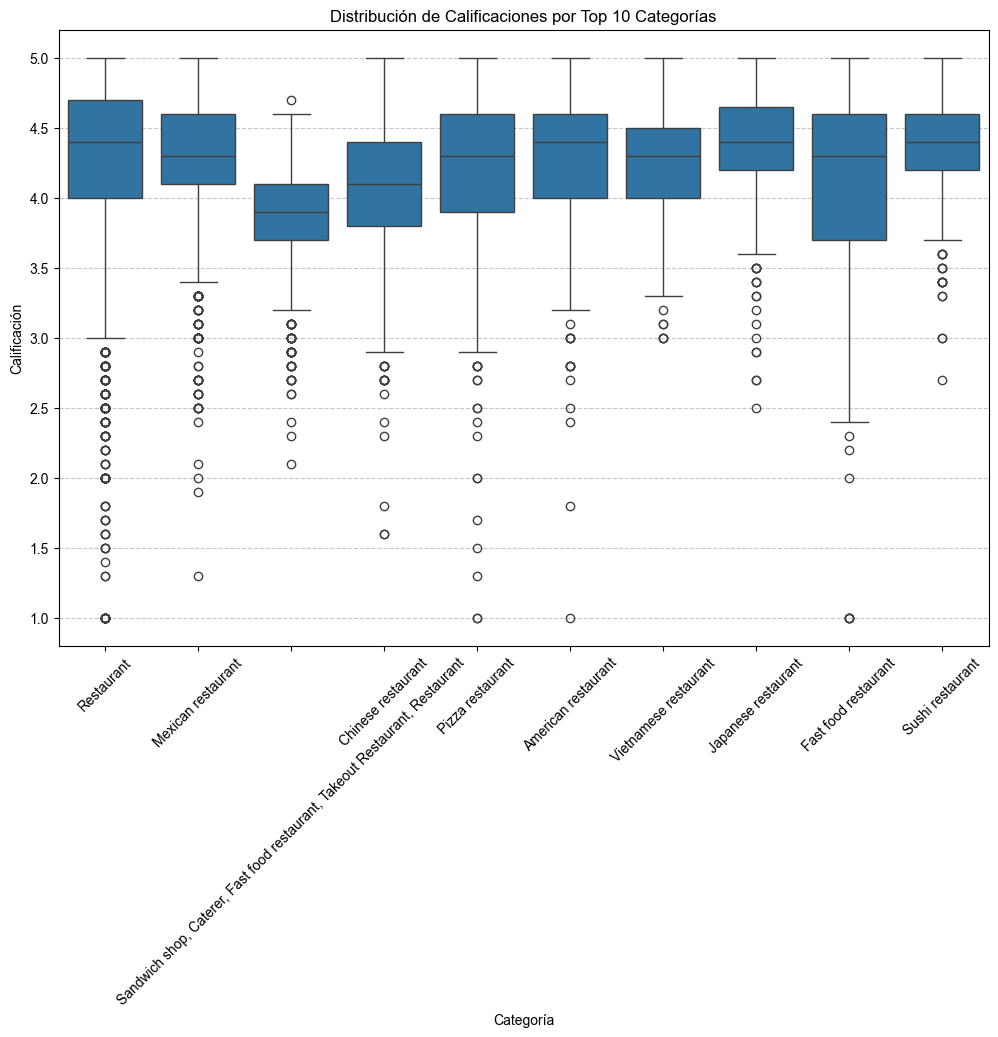

In [103]:
# Distribución de calificaciones por las 10 principales categorías
top_10_categories = df_reduced['category'].value_counts().head(10).index
df_top_10 = df_reduced[df_reduced['category'].isin(top_10_categories)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='avg_rating', data=df_top_10, order=top_10_categories)
plt.title('Distribución de Calificaciones por Top 10 Categorías')
plt.xlabel('Categoría')
plt.ylabel('Calificación')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

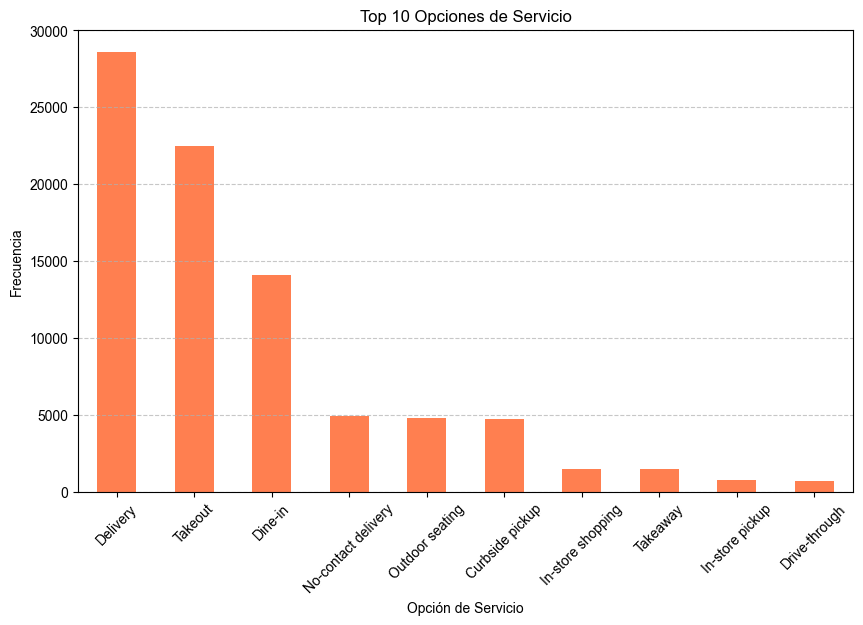

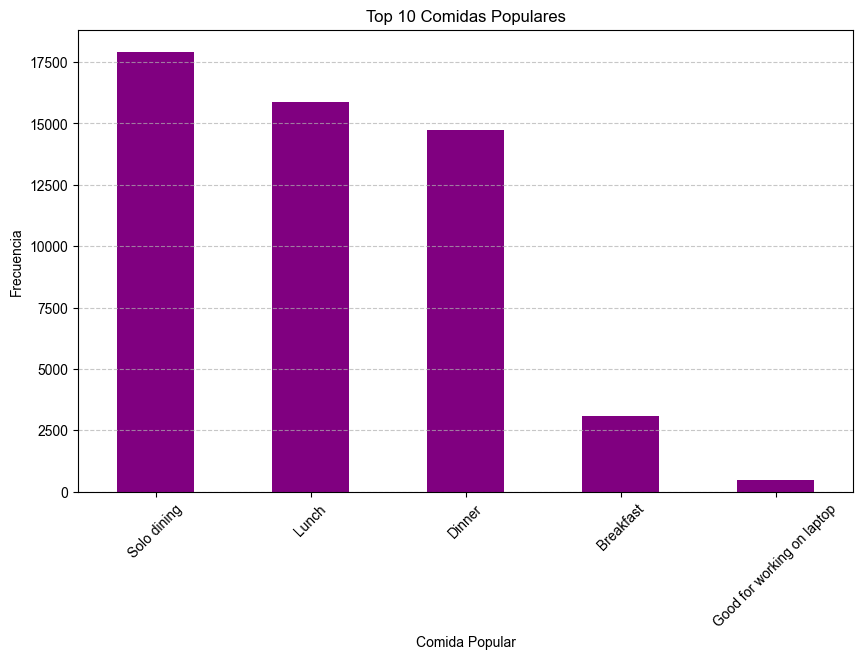

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que estás trabajando con una copia del DataFrame
df_reduced = df.copy()

# Función para convertir cadenas separadas por comas en listas
def split_service_options(service_str):
    if pd.isna(service_str) or service_str.strip() == '':
        return []
    return [option.strip() for option in service_str.split(',')]

def split_popular_for(popular_str):
    if pd.isna(popular_str) or popular_str.strip() == '':
        return []
    return [option.strip() for option in popular_str.split(',')]

# Convertir las columnas en listas
df_reduced['MISC_Service options'] = df_reduced['MISC_Service options'].apply(split_service_options)
df_reduced['MISC_Popular for'] = df_reduced['MISC_Popular for'].apply(split_popular_for)

# Análisis de opciones de servicio: top 10 más frecuentes
service_options_flat = [item for sublist in df_reduced['MISC_Service options'] for item in sublist]
if service_options_flat:
    service_options_counts = pd.Series(service_options_flat).value_counts().head(10)
    plt.figure(figsize=(10, 6))
    service_options_counts.plot(kind='bar', color='coral')
    plt.title('Top 10 Opciones de Servicio')
    plt.xlabel('Opción de Servicio')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No hay opciones de servicio para mostrar.")

# Frecuencia de comidas populares: top 10 más frecuentes
popular_for_flat = [item for sublist in df_reduced['MISC_Popular for'] for item in sublist]
if popular_for_flat:
    popular_for_counts = pd.Series(popular_for_flat).value_counts().head(10)
    plt.figure(figsize=(10, 6))
    popular_for_counts.plot(kind='bar', color='purple')
    plt.title('Top 10 Comidas Populares')
    plt.xlabel('Comida Popular')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No hay comidas populares para mostrar.")
